## DATA STORY: bikeshare data for Capstone 1

## Read in the data: Let's start with reading in a test file of bikeshare data, Quarter 1 in 2016.

In [25]:
import pandas as pd
dateparse = lambda x: pd.datetime.strptime(x, '%m/%d/%Y %H:%M')
bikeshare = pd.read_csv('../Data Wrangling/data/2016-Q1-Trips-History-Data.csv', 
                        parse_dates=True, date_parser=dateparse, index_col='Start date')
bikeshare.columns = ['duration','enddate','startlocID','startloc','endlocID','endloc','bikeID','memtype']
bikeshare.head()

,duration,enddate,startlocID,startloc,endlocID,endloc,bikeID,memtype
Start date,,,,,,,,
2016-03-31 23:59:00,301295,4/1/2016 0:04,31280,11th & S St NW,31506,1st & Rhode Island Ave NW,W00022,Registered
2016-03-31 23:59:00,557887,4/1/2016 0:08,31275,New Hampshire Ave & 24th St NW,31114,18th St & Wyoming Ave NW,W01294,Registered
2016-03-31 23:59:00,555944,4/1/2016 0:08,31101,14th & V St NW,31221,18th & M St NW,W01416,Registered
2016-03-31 23:57:00,766916,4/1/2016 0:09,31226,34th St & Wisconsin Ave NW,31214,17th & Corcoran St NW,W01090,Registered
2016-03-31 23:57:00,139656,3/31/2016 23:59,31011,23rd & Crystal Dr,31009,27th & Crystal Dr,W21934,Registered


In [26]:
bikeshare.duration = bikeshare.duration * 1.66667e-5

### Visualize the data

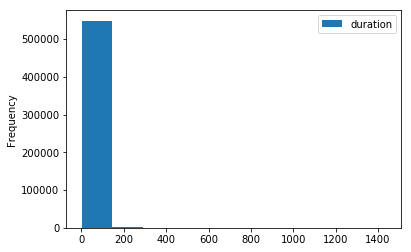

In [28]:
import matplotlib.pyplot as plt
bikeshare.plot(y='duration', kind='hist')
plt.show()

### The automatic choice for number of bins doesn't give us much information.  To 'zoom in' on some of the detail in the distribution, let's increase the number of bins.

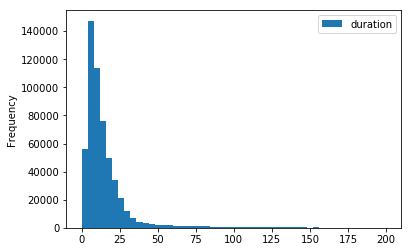

In [29]:
bikeshare.plot(y='duration', kind='hist', bins=50, range=(0,200))
plt.show()

### What are the patterns of bike ride time in relation to time? 

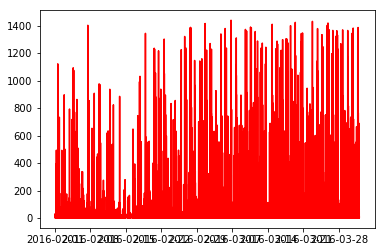

In [30]:
duration = bikeshare['duration']
plt.plot(duration.loc['2016-02':'2016-03'],color='red',label="Duration")
plt.show()

### There is definintely variation in duration across time, but it's hard to digest this figure.  Let's calculate a weekly moving average to smooth out these patterns for easier interpretation.

In [ ]:
## moving average here

### Are there consistent patterns for a given day of the week?

In [31]:
bikeshare['startdate'] = bikeshare.index
bikeshare['startweekday'] = bikeshare['startdate'].apply(lambda d: d.weekday())

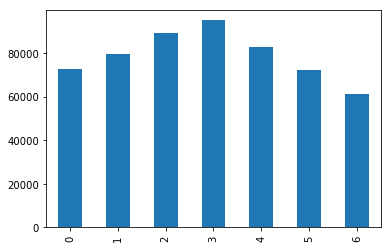

In [32]:
labels = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
bikeshare['startweekday'].value_counts().sort_index().plot(kind='bar')
#plt.xticks(bikeshare['startweekday'],labels, rotation='60') # this is not working for me
plt.show()

### Are there different distributions in bike ride length for registered vs. casual members?

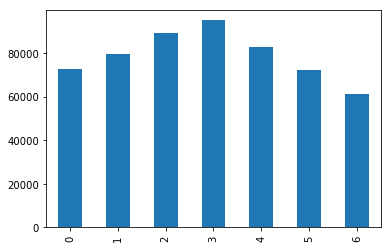

In [33]:
#bikeshare.boxplot(column='duration', by='memtype')
bikeshare['startweekday'].value_counts().sort_index().plot(kind='bar',by='memtype')
plt.show()

### Do bike rental durations vary by the type of client AND day of the week (member type * weekday interaction)?

In [35]:
labels = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
bikeshare['startweekday']['memtype'=='casual'].value_counts().sort_index().plot(kind='bar') # trying to subset each member type
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'value_counts'

## So, what's the story?

So far, we've learned there is quite a bit of variation in length of bike rental for Capital Bikeshare in Washington, D.C.  

However, it seems there may be some consistent patterns in rentals by day of the week.  

Finally, causal and registered users have (*CHECK*) different patterns in use.  



## Next steps:

To move this story forward, we can ask some questions, such as:
1. Can we predict user type by the bike ride duration?
2. Can we predict user type by the day of the week?
3. Compare this winter/spring data to summer or fall data - do the answers to the above questions change?